In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [60]:
archivos = {
    2004: "respondieron_2004.xlsx",
    2024: "respondieron_2024.xlsx"
}


In [61]:
splits = {}

for anio, ruta in archivos.items():
    df = pd.read_excel(ruta)
    
    estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
    if not estado_col:
        raise ValueError(f"No se encontró una columna 'estado' en el archivo del año {anio}.")

    df['desocupado'] = (df[estado_col] == 2).astype(int)

In [62]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])
X.insert(0, 'constante', 1)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [63]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])

X.insert(0, 'constante', 1)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [64]:
splits[anio] = {
'X_train': X_train,
'X_test': X_test,
'y_train': y_train,
'y_test': y_test
    }

In [65]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])
    # Crear tabla de diferencia de medias
diff_means = X_train_num.mean() - X_test_num.mean()
tabla_diff = pd.DataFrame({
'Media Entrenamiento': X_train_num.mean(),
'Media Test': X_test_num.mean(),
'Diferencia': diff_means
})
print(f"\nDiferencia de medias para el año {anio}:")
print(tabla_diff.round(3))


Diferencia de medias para el año 2024:
           Media Entrenamiento  Media Test  Diferencia
constante                1.000       1.000       0.000
level_0              24849.086   25020.324    -171.238
index                24849.086   25020.324    -171.238
ANO4                  2024.000    2024.000       0.000
TRIMESTRE                1.000       1.000       0.000
...                        ...         ...         ...
RDECCFR                  7.895       7.973      -0.077
GDECCFR                  7.940       8.019      -0.079
PDECCFR                    NaN         NaN         NaN
ADECCFR                  7.902       7.968      -0.066
PONDIH                2298.078    2223.961      74.118

[175 rows x 3 columns]


In [66]:
splits = {}

for anio, ruta in archivos.items():
    df = pd.read_excel("respondieron_2004.xlsx")

    estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
    if not estado_col:
        raise ValueError(f"No se encontró una columna 'estado' en el archivo del año {anio}.")

    df['desocupado'] = (df[estado_col] == 2).astype(int)

In [67]:
y = df['desocupado']
X = df.drop(columns=['desocupado', estado_col])
X.insert(0, 'constante', 1)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=444)

In [68]:
splits[anio] = {'X_train': X_train,'X_test': X_test,'y_train': y_train,'y_test': y_test}

In [69]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

diff_means = X_train_num.mean() - X_test_num.mean()
tabla_diff = pd.DataFrame({
'Media Entrenamiento': X_train_num.mean(),
'Media Test': X_test_num.mean(),
'Diferencia': diff_means
})
print(f"\nDiferencia de medias para el año {2004}:")
print(tabla_diff.round(3))


Diferencia de medias para el año 2004:
           Media Entrenamiento  Media Test  Diferencia
constante                1.000       1.000       0.000
level_0               3815.441    3844.661     -29.220
index                 3815.441    3844.661     -29.220
CODUSU              206648.095  206572.037      76.058
nro_hogar                1.025       1.028      -0.003
...                        ...         ...         ...
deccfr                   4.991       4.939       0.052
rdeccfr                  4.691       4.648       0.043
gdeccfr                  4.800       4.757       0.043
adeccfr                  4.766       4.756       0.010
idimpp                1520.391    1721.296    -200.905

[65 rows x 3 columns]


In [70]:
archivos = {
    2004: "respondieron_2004.xlsx",
    2024: "respondieron_2024.xlsx"
}

for anio, ruta in archivos.items():
    try:
        df = pd.read_excel(ruta)

        estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
        if not estado_col:
            print(f"No se encontró 'estado' en el año {anio}.")
            continue

        df['desocupado'] = (df[estado_col] == 2).astype(int)

        if 'salario_semanal' not in df.columns:
            if anio == 2004 and 'p21' in df.columns:
                df['salario_semanal'] = df['p21'] * 631.5 / 40
            elif anio == 2024 and 'P21' in df.columns:
                df['salario_semanal'] = df['P21'] / 40
            else:
                print(f"No se pudo crear 'salario_semanal' en {anio}.")
                continue

        ocupados = df[df[estado_col] == 1].copy()
        columnas = {col.lower(): col for col in ocupados.columns}

        if 'ch09' in columnas:
            ocupados['edad'] = ocupados[columnas['ch09']]
            ocupados['edad2'] = ocupados['edad'] ** 2
        if 'nivel_ed' in columnas:
            ocupados['educ'] = ocupados[columnas['nivel_ed']]
            ocupados['NIVEL_ED'] = ocupados[columnas['nivel_ed']]
        if 'ch04' in columnas:
            ocupados['mujer'] = (ocupados[columnas['ch04']] == 2).astype(int)

        modelos = [
            ['edad'],
            ['edad', 'edad2'],
            ['edad', 'edad2', 'educ'],
            ['edad', 'edad2', 'educ', 'mujer'],
            ['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED', columnas.get('ch04', 'CH04')]
        ]

        for i, vars in enumerate(modelos, start=1):
            if all(v in ocupados.columns for v in vars):
                df_m = ocupados[['salario_semanal'] + vars].dropna()
                y = df_m['salario_semanal']
                X = sm.add_constant(df_m[vars])
                modelo = sm.OLS(y, X).fit()

                print(f"\nModelo {i}:")
                print("Coeficientes:\n", modelo.params.round(3))
                print("Errores estándar:\n", modelo.bse.round(3))
                print("P-valores:\n", modelo.pvalues.round(3))
                print("R-cuadrado:", round(modelo.rsquared, 4))
            else:
                print(f"\nModelo {i}: faltan columnas: {[v for v in vars if v not in ocupados.columns]}")

    except Exception as e:
        print(f"Error en el año {anio}: {e}")


Error en el año 2004: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Modelo 1:
Coeficientes:
 const    7706.526
edad    -1117.443
dtype: float64
Errores estándar:
 const    1250.963
edad     1231.816
dtype: float64
P-valores:
 const    0.000
edad     0.364
dtype: float64
R-cuadrado: 0.0003

Modelo 2:
Coeficientes:
 const    11255.387
edad     -5087.510
edad2      426.321
dtype: float64
Errores estándar:
 const    5072.172
edad     5635.171
edad2     590.489
dtype: float64
P-valores:
 const    0.027
edad     0.367
edad2    0.470
dtype: float64
R-cuadrado: 0.0004

Modelo 3:
Coeficientes:
 const    6726.059
edad    -7310.923
edad2     653.929
educ     1525.947
dtype: float64
Errores estándar:
 const    4985.539
edad     5525.228
edad2     578.953
educ      131.577
dtype: float64
P-valores:
 const    0.177
edad     0.186
edad2    0.259
educ     0.000
dtype: float64
R-cuadrado: 0.0405

Modelo 4:
Coeficientes:
 const    6673.537
edad    -6724.342
edad2   

In [71]:
respondieron_2004 = pd.read_excel("respondieron_2004.xlsx")
num_respondieron_2004 = respondieron_2004.copy()

num_respondieron_2004['ch09'] = num_respondieron_2004['ch09'].map({
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3
})

num_respondieron_2004['nivel_ed'] = num_respondieron_2004['nivel_ed'].map({
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr': 9
})

num_respondieron_2004['ch04'] = num_respondieron_2004['ch04'].map({
    'Varón': 1,
    'Mujer': 2
})
num_respondieron_2004['desocupado'] = (num_respondieron_2004['estado'] == "Desocupado").astype(int)


X_2004 = num_respondieron_2004[['ch09', 'nivel_ed', 'ch04']]


X_2004['intercepto'] = 1


y_2004 = num_respondieron_2004['desocupado']

data = pd.concat([X_2004, y_2004], axis=1).dropna()
X_clean_2004 = data.drop(columns='desocupado')
y_clean_2004 = data['desocupado']


X_2004_train, X_2004_test, y_2004_train, y_2004_test = train_test_split(X_clean_2004, y_clean_2004, train_size=0.7, random_state=444)


print("X_2004_train shape:", X_2004_train.shape)
print("X_2004_test shape:", X_2004_test.shape)
print("y_2004_train shape:", y_2004_train.shape)
print("y_2004_test shape:", y_2004_test.shape)

X_2004_train shape: (5344, 4)
X_2004_test shape: (2291, 4)
y_2004_train shape: (5344,)
y_2004_test shape: (2291,)


/tmp/ipykernel_314/3233522692.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2004['intercepto'] = 1


In [88]:
X_2004['edad'] = pd.to_numeric(X_2004['ch06'], errors='coerce')
X_2004 = X_2004.dropna(subset=['edad'])
X_2004['ch06_2'] = X_2004['edad'] ** 2  


X_2004['nivel_ed'] = pd.to_numeric(X_2004['nivel_ed'], errors='coerce')
X_2004['ch04'] = pd.to_numeric(X_2004['ch04'], errors='coerce')  


X_2004 = X_2004[['ch06', 'nivel_ed', 'ch04', 'ch06_2']].copy() 
X_2004['educ'] = X_2004['nivel_ed']
X_2004['intercepto'] = 1

y_2004 = ocupados_2004['salario_semanal']


data = pd.concat([X_2004, y_2004], axis=1).dropna()
X_clean = data.drop(columns='salario_semanal')
y_clean = data['salario_semanal']


X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, train_size=0.7, random_state=444)


modelos = {
    'modelo_1': ['ch06'],
    'modelo_2': ['ch06', 'ch06_2'],
    'modelo_3': ['ch06', 'ch06_2', 'educ'],
    'modelo_4': ['ch06', 'ch06_2', 'educ', 'ch04'],
    'modelo_5': ['ch06', 'ch06_2', 'educ', 'ch04', "nivel_ed"]}


resultados = {}

for nombre, vars in modelos.items():
    
    vars_existentes = [var for var in vars if var in X_train.columns]
    if len(vars_existentes) != len(vars):
        print(f"Advertencia: Algunas variables no existen para {nombre}. Usando solo: {vars_existentes}")
    
   
    if 'intercepto' in X_train.columns:
        X_train_m = X_train[vars_existentes].copy()
        X_test_m = X_test[vars_existentes].copy()
    else:
        X_train_m = sm.add_constant(X_train[vars_existentes])
        X_test_m = sm.add_constant(X_test[vars_existentes])

    
    X_train_m = X_train_m.apply(pd.to_numeric, errors='coerce')
    X_test_m = X_test_m.apply(pd.to_numeric, errors='coerce')
    
    
    X_train_m = X_train_m.dropna()
    y_train_clean = y_train.loc[X_train_m.index]
    
    X_test_m = X_test_m.dropna()
    y_test_clean = y_test.loc[X_test_m.index]

    modelo = sm.OLS(y_train_clean, X_train_m).fit()
    y_pred = modelo.predict(X_test_m)

    mse = mean_squared_error(y_test_clean, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_clean, y_pred)

    resultados[nombre] = {'MSE': round(mse, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2)}


tabla_resultados = pd.DataFrame(resultados).T
print("\n📊 Tabla de errores del modelo (Año 2004):")
print(tabla_resultados)


📊 Tabla de errores del modelo (Año 2004):
                   MSE      RMSE      MAE
modelo_1  1.153219e+08  10738.80  6910.78
modelo_2  1.111592e+08  10543.20  6852.75
modelo_3  9.819264e+07   9909.22  6534.51
modelo_4  9.007160e+07   9490.61  6100.01
modelo_5  9.007160e+07   9490.61  6100.01


In [81]:
for anio, ruta in archivos.items():
    if anio != 2024:
        continue  

    try:
        df = pd.read_excel(ruta)

        estado_col = next((col for col in df.columns if col.lower() == 'estado'), None)
        if not estado_col:
            continue

        estado_mapping = {
            'Inactivo': 0,
            'Ocupado': 1,
            'Desocupado': 2,
            'Menor de 10 años': 3
        }

        if df[estado_col].dtype == 'object':
            df['estado_num'] = df[estado_col].map(estado_mapping)
        else:
            df['estado_num'] = df[estado_col]

        df['desocupado'] = (df['estado_num'] == 2).astype(int)

        if 'salario_semanal' not in df.columns:
            if anio == 2024 and 'P21' in df.columns:
                df['salario_semanal'] = df['P21'] / 40
            else:
                continue

        ocupados = df[df['estado_num'] == 1].copy()
        if ocupados.empty:
            continue

        columnas = {col.lower(): col for col in ocupados.columns}

        if 'ch06' in columnas:
            ocupados['edad'] = pd.to_numeric(ocupados[columnas['ch06']], errors='coerce')
            ocupados = ocupados.dropna(subset=['edad'])
            ocupados['edad2'] = ocupados['edad'] ** 2

        if 'nivel_ed' in columnas:
            ocupados['educ'] = pd.to_numeric(ocupados[columnas['nivel_ed']], errors='coerce')
            ocupados['NIVEL_ED'] = pd.to_numeric(ocupados[columnas['nivel_ed']], errors='coerce')

        if 'ch04' in columnas:
            ocupados['mujer'] = (ocupados[columnas['ch04']] == 2).astype(int)

        y = pd.to_numeric(ocupados['salario_semanal'], errors='coerce')
        ocupados = ocupados.dropna(subset=['salario_semanal'])

        variables = {
            "modelo_1": ['edad'],
            "modelo_2": ['edad', 'edad2'],
            "modelo_3": ['edad', 'edad2', 'educ'],
            "modelo_4": ['edad', 'edad2', 'educ', 'mujer'],
            "modelo_5": ['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED']
        }

        resultados = {}

        for nombre, vars in variables.items():
            if not all(v in ocupados.columns for v in vars):
                continue

            X = ocupados[vars]
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444)

            X_train = sm.add_constant(X_train)
            X_test = sm.add_constant(X_test, has_constant='add')

            modelo = sm.OLS(y_train, X_train).fit()
            y_pred = modelo.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)

            resultados[nombre] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

        tabla = pd.DataFrame(resultados).T.round(2)
        print("\n📊 Tabla de errores del modelo (Año 2024):")
        print(tabla)

    except Exception as e:
        pass 


📊 Tabla de errores del modelo (Año 2024):
                  MSE     RMSE      MAE
modelo_1  97337918.49  9866.00  6014.12
modelo_2  96728951.22  9835.09  5947.48
modelo_3  92614507.79  9623.64  5727.75
modelo_4  91613815.51  9571.51  5657.40
modelo_5  91613815.51  9571.51  5657.40


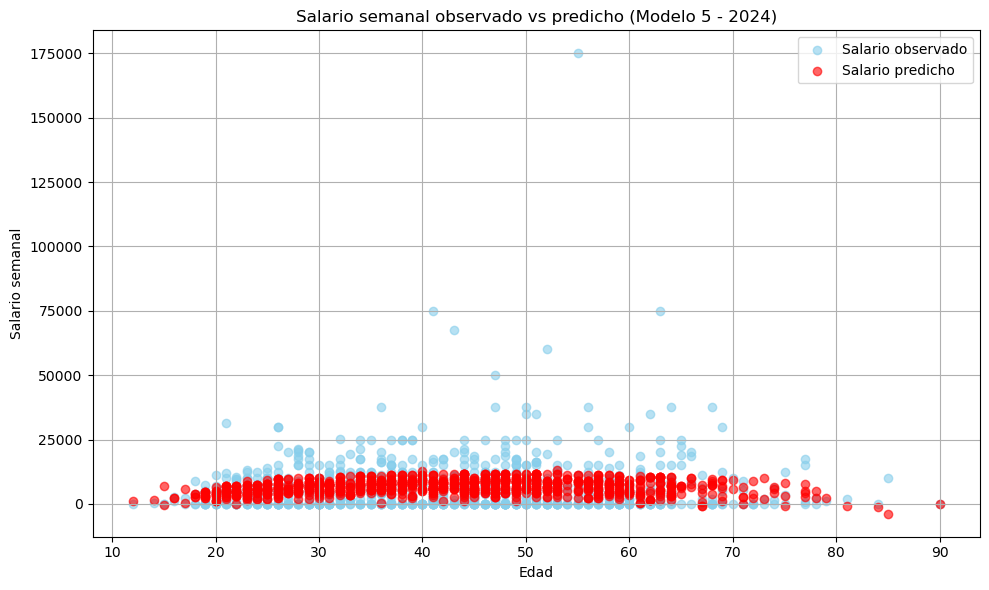

In [74]:
df = pd.read_excel("respondieron_2024.xlsx")


df['estado'] = df['ESTADO']  
df['estado_num'] = df['estado']
df['salario_semanal'] = df['P21'] / 40


ocupados = df[df['estado_num'] == 1].copy()


ocupados['edad'] = pd.to_numeric(ocupados['CH06'], errors='coerce')
ocupados['edad2'] = ocupados['edad'] ** 2
ocupados['educ'] = pd.to_numeric(ocupados['NIVEL_ED'], errors='coerce')
ocupados['NIVEL_ED'] = pd.to_numeric(ocupados['NIVEL_ED'], errors='coerce')
ocupados['mujer'] = (ocupados['CH04'] == 2).astype(int)


ocupados = ocupados.dropna(subset=['salario_semanal', 'edad', 'edad2', 'educ', 'NIVEL_ED', 'mujer'])


X = ocupados[['edad', 'edad2', 'educ', 'mujer', 'NIVEL_ED']]
y = ocupados['salario_semanal']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444)


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


modelo = sm.OLS(y_train, X_train).fit()


y_pred = modelo.predict(X_test)


edades_test = X_test['edad']


plt.figure(figsize=(10, 6))
plt.scatter(edades_test, y_test, color='skyblue', label='Salario observado', alpha=0.6)
plt.scatter(edades_test, y_pred, color='red', label='Salario predicho', alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Salario semanal")
plt.title("Salario semanal observado vs predicho (Modelo 5 - 2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
  

import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
os.getcwd()

'C:\\Users\\Joaquin\\Desktop\\Facu\\big data\\TPs\\TP4_Regresión&Clasificación'

In [4]:
os.chdir("\\Users\\Joaquin\\Desktop\\Facu\\big data\\TPs\\TP2_Introducción a la EPH\\Bases de microdatos EPH")

In [5]:
respondieron_2004 = pd.read_excel("respondieron_2004.xlsx")

In [6]:
respondieron_2024 = pd.read_excel("respondieron_2024.xlsx")

In [7]:
no_respondieron_2004 = pd.read_excel("no_respondieron_2004.xlsx")

In [8]:
no_respondieron_2024 = pd.read_excel("no_respondieron_2024.xlsx")

In [9]:
#transformamos las variables cualitativas a numeradas
num_respondieron_2004 = respondieron_2004.copy()

num_respondieron_2004['ch09'] = num_respondieron_2004['ch09'].map({
    'Sí': 1,
    'No': 2,
    'Menor de 2 años': 3
})

num_respondieron_2004['nivel_ed'] = num_respondieron_2004['nivel_ed'].map({
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr': 9
})

num_respondieron_2004['ch04'] = num_respondieron_2004['ch04'].map({
    'Varón': 1,
    'Mujer': 2
})

In [10]:
num_respondieron_2004['desocupado'] = (num_respondieron_2004['estado'] == "Desocupado").astype(int)


X_2004 = num_respondieron_2004[['ch09', 'nivel_ed', 'ch04']]


X_2004['intercepto'] = 1


y_2004 = num_respondieron_2004['desocupado']

data = pd.concat([X_2004, y_2004], axis=1).dropna()
X_clean_2004 = data.drop(columns='desocupado')
y_clean_2004 = data['desocupado']


X_2004_train, X_2004_test, y_2004_train, y_2004_test = train_test_split(X_clean_2004, y_clean_2004, train_size=0.7, random_state=444)


print("X_2004_train shape:", X_2004_train.shape)
print("X_2004_test shape:", X_2004_test.shape)
print("y_2004_train shape:", y_2004_train.shape)
print("y_2004_test shape:", y_2004_test.shape)

X_2004_train shape: (5344, 4)
X_2004_test shape: (2291, 4)
y_2004_train shape: (5344,)
y_2004_test shape: (2291,)


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_5308\737498261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2004['intercepto'] = 1


In [11]:
respondieron_2024['desocupado'] = (respondieron_2024['ESTADO'] == 2).astype(int)


X_2024 = respondieron_2024[['CH09', 'CH04', 'NIVEL_ED']].copy()
X_2024['intercepto'] = 1  


y_2024 = respondieron_2024['desocupado']


data = pd.concat([X_2024, y_2024], axis=1).dropna()
X_clean_2024 = data.drop(columns='desocupado')
y_clean_2024 = data['desocupado']


X_2024_train, X_2024_test, y_2024_train, y_2024_test = train_test_split(
    X_clean_2024, y_clean_2024, train_size=0.7, random_state=444
)

print (X_2024_train.shape)
print (X_2024_test.shape)

(4907, 4)
(2103, 4)


In [12]:
#Logit con su matriz de confusion, curva ROC, AUC score y accuracy para el año 2004

In [13]:
log_reg_2004 = LogisticRegression(penalty=None).fit(X_2004_train.astype(float), y_2004_train.astype(float))

In [14]:
print(log_reg_2004.coef_)

[[-3.33812433  0.15308804  0.1966337   0.04927833]]


In [15]:
logit_model_2004 = sm.Logit(y_2004_train.astype(float), X_2004_train.astype(float))
results_2004 = logit_model_2004.fit()


print(results_2004.summary2())

Optimization terminated successfully.
         Current function value: 0.249278
         Iterations 10
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: desocupado       Pseudo R-squared: 0.037     
Date:               2025-06-03 13:12 AIC:              2672.2862 
No. Observations:   5344             BIC:              2698.6211 
Df Model:           3                Log-Likelihood:   -1332.1   
Df Residuals:       5340             LL-Null:          -1383.5   
Converged:          1.0000           LLR p-value:      3.9615e-22
No. Iterations:     10.0000          Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
ch09          -3.3481    0.7056  -4.7453  0.0000  -4.7310  -1.9652
nivel_ed       0.1521    0.0322   4.7300  0.0000   0.0891   0

In [16]:
y_pred_score2004 = log_reg_2004.predict_proba(X_2004_test)[:,1]

In [17]:
y_pred_2004 = results_2004.predict(X_2004_test)

In [18]:
y_pred_2004 = np.where(y_pred_2004 > 0.5, 1, 0)

In [19]:
#matriz de confusion
matriz_confusion2004 = confusion_matrix(y_2004_test, y_pred_2004)

print('Confusion Matrix:')
print(matriz_confusion2004) 

Confusion Matrix:
[[2148    0]
 [ 143    0]]


In [20]:
y_train_pred_2004 = log_reg_2004.predict(X_2004_train)
y_test_pred_2004 = log_reg_2004.predict(X_2004_test)

In [21]:
y_pred_prob = results_2004.predict(X_2004_test)

In [22]:
# accuracy 
accuracy_2004_test = accuracy_score(y_2004_test, y_pred_2004)
print('Accuracy Test de la test base: %f' % accuracy_2004_test)

Accuracy Test de la test base: 0.937582


In [23]:
fpr_2004, tpr_2004, thresholds_2004 = roc_curve(y_2004_test, y_pred_score2004)

In [24]:
print('Thresholds:', thresholds_2004)   
print('FPR:', fpr_2004)
print('TPR:', tpr_2004)

Thresholds: [       inf 0.14496079 0.12699739 0.12224742 0.11097109 0.10674724
 0.09674309 0.09300415 0.08416661 0.08087021 0.07309276 0.07019682
 0.06337508 0.06083889 0.0526578  0.00598314 0.00492036 0.00239652
 0.00196957 0.00021366 0.00017552]
FPR: [0.         0.00372439 0.05027933 0.05307263 0.09357542 0.13314711
 0.20437616 0.24301676 0.33705773 0.3952514  0.51443203 0.60009311
 0.69972067 0.79702048 0.87802607 0.91201117 0.94972067 0.95856611
 0.96461825 0.98324022 1.        ]
TPR: [0.         0.         0.06993007 0.06993007 0.16083916 0.18881119
 0.30769231 0.38461538 0.46153846 0.59440559 0.66433566 0.8041958
 0.85314685 0.94405594 1.         1.         1.         1.
 1.         1.         1.        ]


In [25]:
# AUC score
auc_2004 = roc_auc_score(y_2004_test, y_pred_score2004) 
print('El AUC(Area Under Curve) es: %.2f' % auc_2004)

El AUC(Area Under Curve) es: 0.62


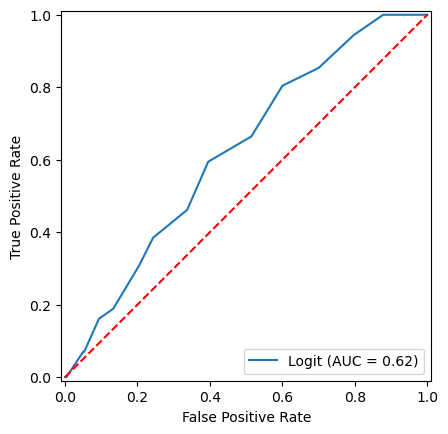

In [26]:
# Curva ROC
display = RocCurveDisplay(fpr=fpr_2004, tpr=tpr_2004, roc_auc=auc_2004, estimator_name='Logit')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [27]:
# vecinos cercanos con su matriz de confusion, curva ROC, AUC score y accuracy para el año 2004

In [28]:
k_range = range(1,10)
scores2004 = {}      
scores_list2004 = [] 
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_2004_train, y_2004_train)
        y_pred_knn_2004 = knn.predict(X_2004_test)
        scores2004[k] = accuracy_score(y_2004_test, y_pred_knn_2004)
        scores_list2004.append(accuracy_score(y_2004_test, y_pred_knn_2004))

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_2004_train, y_2004_train)

KNeighborsClassifier()

Text(0, 0.5, 'Testing Accuracy')

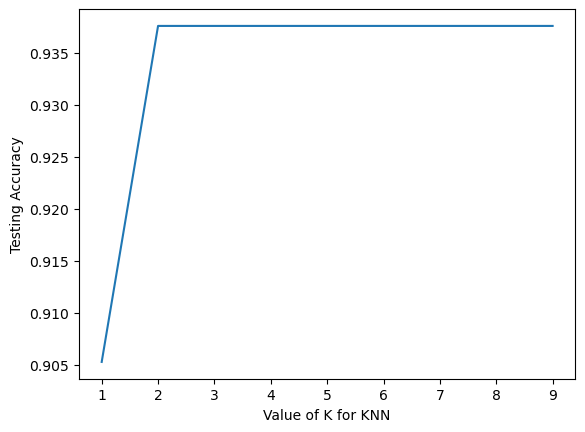

In [30]:
plt.plot(k_range, scores_list2004)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [31]:
# accuracy
y_test_pred_knn2004 = knn.predict(X_2004_test)
accuracy_knn2004 = accuracy_score(y_2004_test, y_test_pred_knn2004)
print("Este modelo tiene una accuracy de: %.3f" %accuracy_knn2004)

Este modelo tiene una accuracy de: 0.938


In [32]:
# matriz de confusion
print(pd.crosstab(index=y_2004_test, columns=y_test_pred_knn2004))

col_0          0
desocupado      
0           2148
1            143


In [33]:
# AUC score
y_pred_knn_prob_2004 = knn.predict_proba(X_2004_test)[:, 1]

auc_score_knn_2004 = roc_auc_score(y_2004_test, y_pred_knn_prob_2004)
print("AUC Score cuando (K=5):", auc_score_knn_2004)

AUC Score cuando (K=5): 0.5305178992329831


In [34]:
fpr_2004_knn, tpr_2004_knn, thresholds_2004_knn = roc_curve(y_2004_test, y_pred_knn_prob_2004)

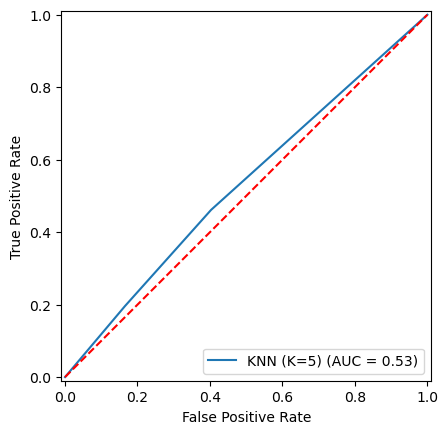

In [35]:
# curva ROC
display = RocCurveDisplay(fpr=fpr_2004_knn, tpr=tpr_2004_knn, roc_auc=auc_score_knn_2004, estimator_name='KNN (K=5)')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [ ]:
#Logit con su matriz de confusion, curva ROC, AUC score y accuracy para el año 2024

In [36]:
log_reg_2024 = LogisticRegression(penalty=None).fit(X_2024_train, y_2024_train)

In [37]:
print(log_reg_2024.coef_)
print(log_reg_2024.intercept_)

[[-6.38291727  0.0189148   0.12141279  1.42480309]]
[1.42480309]


In [38]:
logit_model_2024 = sm.Logit(y_2024_train.astype(float),X_2024_train.astype(float))
results_2024 = logit_model_2024.fit()
print(results_2024.summary2())

         Current function value: 0.173113
         Iterations: 35
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: desocupado       Pseudo R-squared: 0.020     
Date:               2025-06-03 13:15 AIC:              1706.9356 
No. Observations:   4907             BIC:              1732.9292 
Df Model:           3                Log-Likelihood:   -849.47   
Df Residuals:       4903             LL-Null:          -867.22   
Converged:          0.0000           LLR p-value:      9.5672e-08
No. Iterations:     35.0000          Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
CH09          -13.8479 268.1216 -0.0516 0.9588 -539.3566 511.6607
CH04            0.0234   0.1417  0.1651 0.8689   -0.2543   0.3011
NIVEL_ED        0.1220   0.0451  2.7

C:\Users\Joaquin\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
y_pred_score2024 = log_reg_2024.predict_proba(X_2024_test)[:,1]

In [40]:
y_pred_2024 = results_2024.predict(X_2024_test)

In [41]:
y_pred_2024 = np.where(y_pred_2024 > 0.5, 1, 0)

In [42]:
#matriz de confusion
matriz_confusion2024 = confusion_matrix(y_2024_test, y_pred_2024)

print('Confusion Matrix:')
print(matriz_confusion2024) 

Confusion Matrix:
[[2002    0]
 [ 101    0]]


In [43]:
y_train_pred_2024 = log_reg_2024.predict(X_2024_train)
y_test_pred_2024 = log_reg_2024.predict(X_2024_test)

In [44]:
y_pred_prob_2024 = results_2024.predict(X_2024_test)

In [45]:
# accuracy 
accuracy_2024_test = accuracy_score(y_2024_test, y_pred_2024)
print('Accuracy Test de la test base: %f' % accuracy_2024_test)

Accuracy Test de la test base: 0.951973


In [46]:
fpr_2024, tpr_2024, thresholds_2024 = roc_curve(y_2024_test, y_pred_score2024)

In [47]:
print('Thresholds:', thresholds_2024)   
print('FPR:', fpr_2024)
print('TPR:', tpr_2024)

Thresholds: [           inf 6.62612170e-02 6.51005028e-02 5.91334393e-02
 5.80898164e-02 5.27291043e-02 5.17922872e-02 4.69837422e-02
 4.61440282e-02 4.18367463e-02 4.10850560e-02 3.72315680e-02
 3.65594629e-02 3.31157847e-02 3.25154685e-02 1.19926780e-04
 1.17679972e-04 5.78854868e-05 5.68009458e-05 2.02722719e-07
 1.98924296e-07 2.23830872e-24]
FPR: [0.         0.004995   0.01398601 0.11688312 0.18131868 0.24975025
 0.30569431 0.41158841 0.51398601 0.61688312 0.71928072 0.77572428
 0.82317682 0.88361638 0.94305694 0.96253746 0.97952048 0.98451548
 0.98751249 0.99350649 0.999001   1.        ]
TPR: [0.         0.         0.         0.06930693 0.07920792 0.21782178
 0.28712871 0.51485149 0.68316832 0.77227723 0.86138614 0.89108911
 0.99009901 0.99009901 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [48]:
# AUC score
auc_2024 = roc_auc_score(y_2024_test, y_pred_score2024) 
print('El AUC(Area Under Curve) es: %.2f' % auc_2024)

El AUC(Area Under Curve) es: 0.56


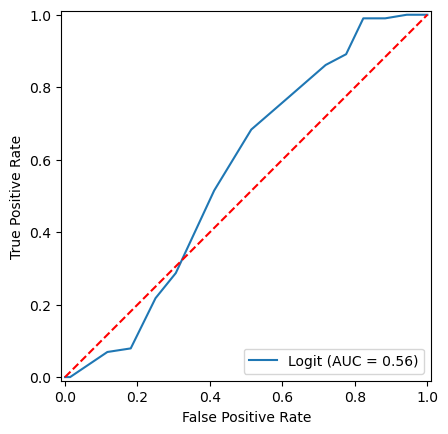

In [49]:
# Curva ROC
display_2024 = RocCurveDisplay(fpr=fpr_2024, tpr=tpr_2024, roc_auc=auc_2024, estimator_name='Logit')
display_2024.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [ ]:
# vecinos cercanos con su matriz de confusion, curva ROC, AUC score y accuracy para el año 2024

In [50]:
k_range = range(1,10)
scores2024 = {}      
scores_list2024 = [] 
for k in k_range:
        knn_2024 = KNeighborsClassifier(n_neighbors=k)
        knn_2024.fit(X_2024_train, y_2024_train)
        y_pred_knn_2024 = knn_2024.predict(X_2024_test)
        scores2024[k] = accuracy_score(y_2024_test, y_pred_knn_2024)
        scores_list2024.append(accuracy_score(y_2024_test, y_pred_knn_2024))

In [51]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_2024_train, y_2024_train)

KNeighborsClassifier()

Text(0, 0.5, 'Testing Accuracy')

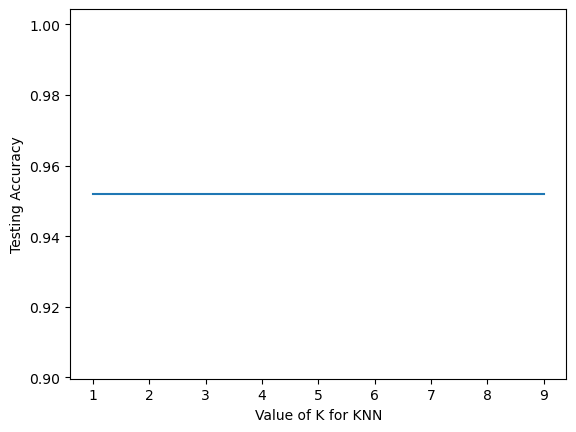

In [52]:
plt.plot(k_range, scores_list2024)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [53]:
# accuracy
y_test_pred_knn2024 = knn_5.predict(X_2024_test)
accuracy_knn2024 = accuracy_score(y_2024_test, y_test_pred_knn2024)
print("Este modelo tiene una accuracy de: %.3f" %accuracy_knn2024)

Este modelo tiene una accuracy de: 0.952


In [54]:
# matriz de confusion
print(pd.crosstab(index=y_2024_test, columns=y_test_pred_knn2024))

col_0          0
desocupado      
0           2002
1            101


In [55]:
# AUC score
y_pred_knn_prob_2024 = knn_5.predict_proba(X_2024_test)[:, 1]

auc_score_knn_2024 = roc_auc_score(y_2024_test, y_pred_knn_prob_2024)
print("AUC Score cuando (K=5):", auc_score_knn_2024)

AUC Score cuando (K=5): 0.5


In [56]:
fpr_2024_knn, tpr_2024_knn, thresholds_2024_knn = roc_curve(y_2024_test, y_pred_knn_prob_2024)

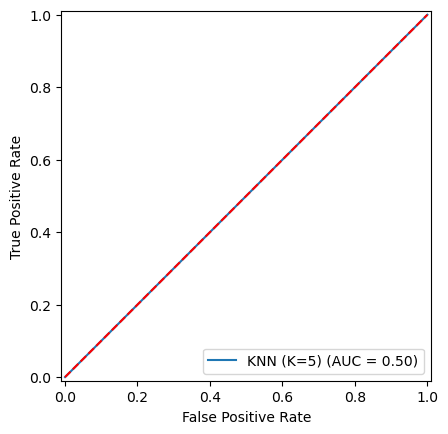

In [57]:
# curva ROC
display_2024 = RocCurveDisplay(fpr=fpr_2024_knn, tpr=tpr_2024_knn, roc_auc=auc_score_knn_2024, estimator_name='KNN (K=5)')
display_2024.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [58]:
#Punto 6

In [59]:

no_respondieron_2004['ch09'] = no_respondieron_2004['ch09'].map({'Sí': 1, 'No': 2, 'Menor de 2 años': 3})
no_respondieron_2004['nivel_ed'] = no_respondieron_2004['nivel_ed'].map({
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr.': 9
})
no_respondieron_2004['ch04'] = no_respondieron_2004['ch04'].map({'Varón': 1, 'Mujer': 2})


X_pred2004 = no_respondieron_2004[['ch09', 'nivel_ed', 'ch04']].copy()
X_pred2004['intercepto'] = 1 



y_prob2004 = results_2004.predict(X_pred2004)


y_prob_2004 = (y_prob2004 > 0.5).astype(int)


no_respondieron_2004['prob_desocupado'] = y_prob2004
no_respondieron_2004['pred_desocupado'] = y_prob2004


print("Cantidad estimada de personas desocupadas:", no_respondieron_2004['pred_desocupado'].sum())

Cantidad estimada de personas desocupadas: 0.6891749738968161


In [60]:

X_pred2024 = no_respondieron_2024[['CH09', 'CH04', 'NIVEL_ED']].copy()
X_pred2024['intercepto'] = 1  


y_prob2024 = results_2024.predict(X_pred2024)


y_prob_2024 = (y_prob2024 > 0.5).astype(int)


no_respondieron_2024['prob_desocupado'] = y_prob2024
no_respondieron_2024['pred_desocupado'] = y_prob2024


print("Cantidad estimada de personas desocupadas:", no_respondieron_2024['pred_desocupado'].sum())

Cantidad estimada de personas desocupadas: 1.4568817989571214
